In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [5]:
df= pd.read_csv("mhealth_data.csv")

In [6]:
df


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [8]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: xlabel='Activity'>

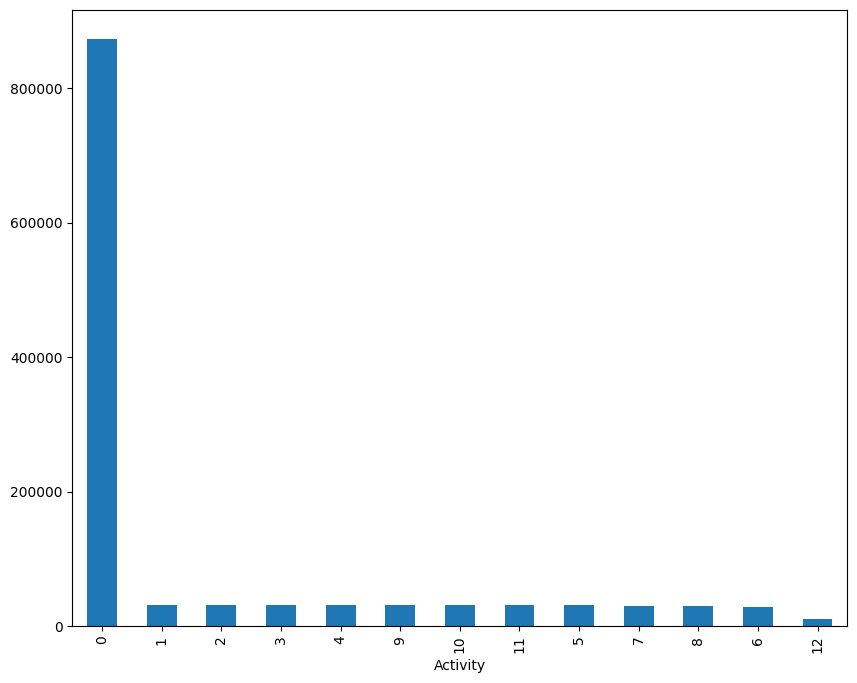

In [10]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [11]:
df = df[df['Activity']!=0]

<Axes: xlabel='Activity'>

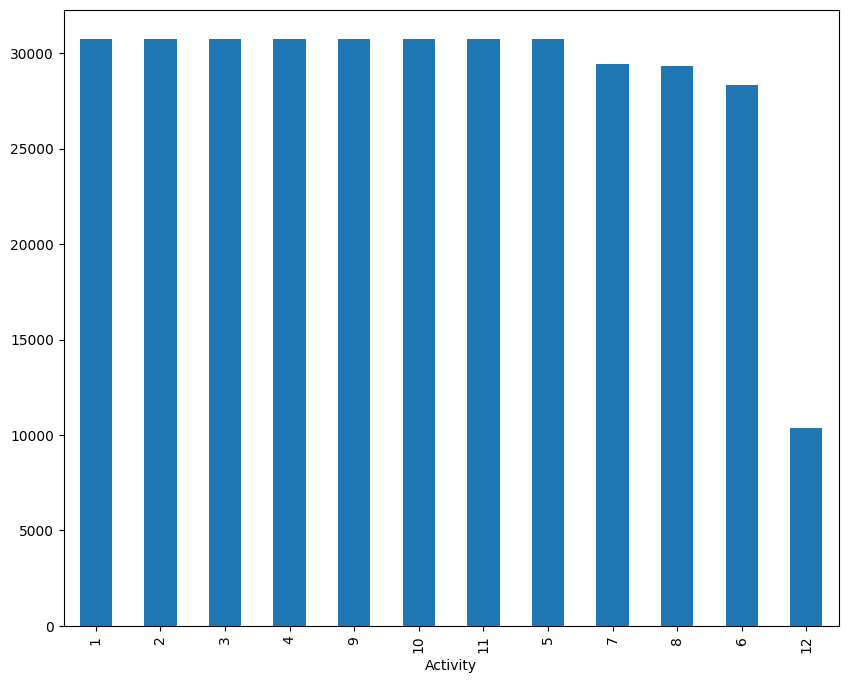

In [12]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [13]:
activity_label = {
1: "Standing still (1 min)",
2: "Sitting and relaxing (1 min)",
3: "Lying down (1 min)",
4: "Walking (1 min)",
5: "Climbing stairs (1 min)",
6: "Waist bends forward (20x)",
7: "Frontal elevation of arm (20x)",
8: "Knees bending (crouching) (20x)",
9: "Cycling (1 min)",
10: "Jogging (1 min)",
11: "Running (1 min)",
12: "Jump front & back (20x)"
}



          ---------------------- Standing still (1 min) - a ----------------------


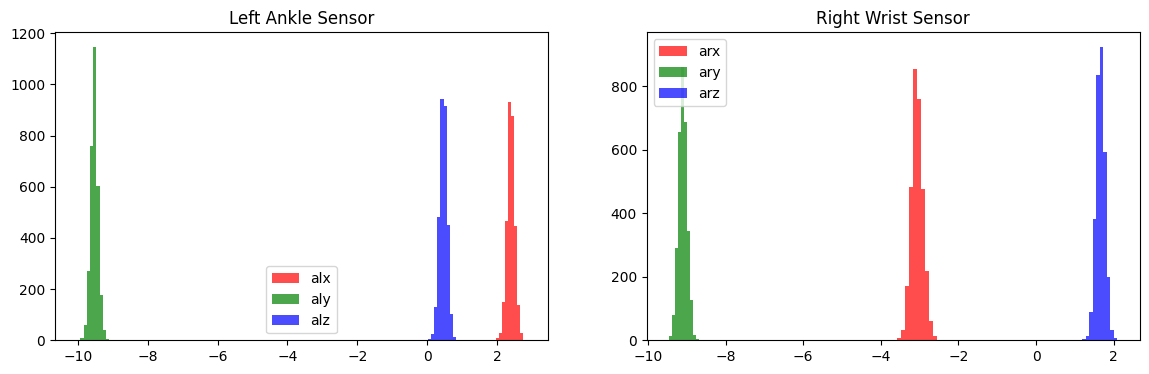



          ---------------------- Standing still (1 min) - g ----------------------


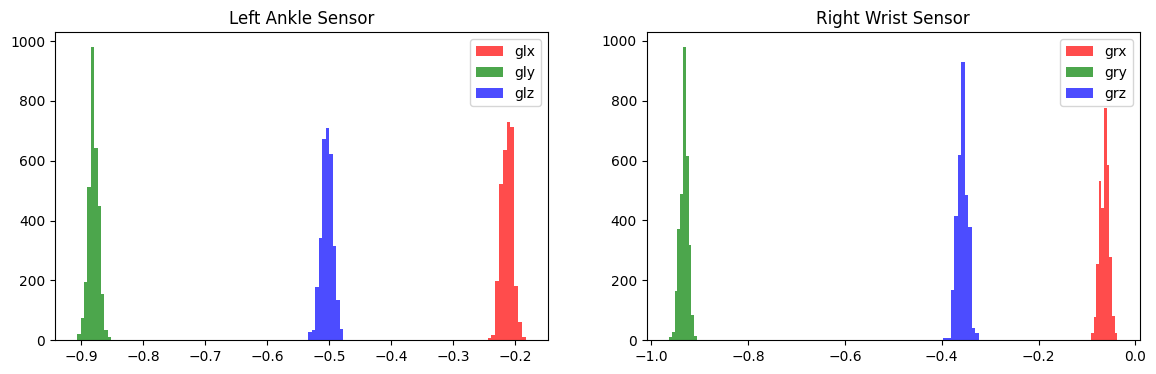



          ---------------------- Sitting and relaxing (1 min) - a ----------------------


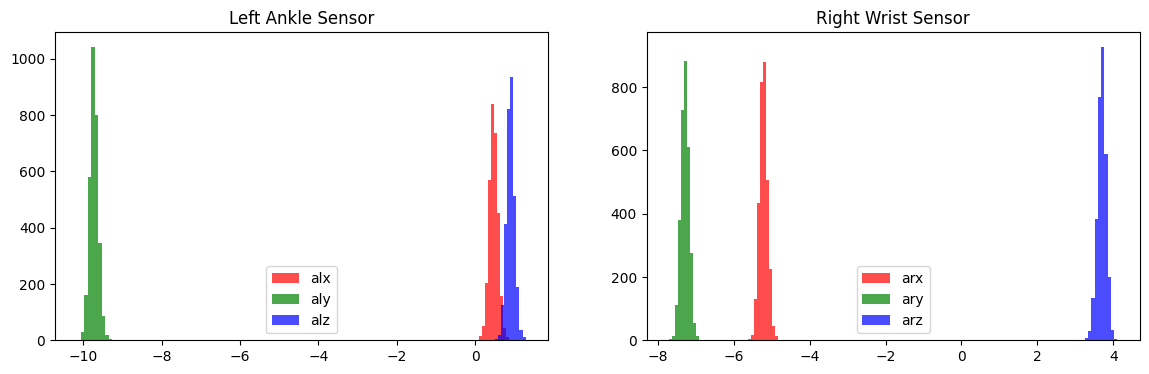



          ---------------------- Sitting and relaxing (1 min) - g ----------------------


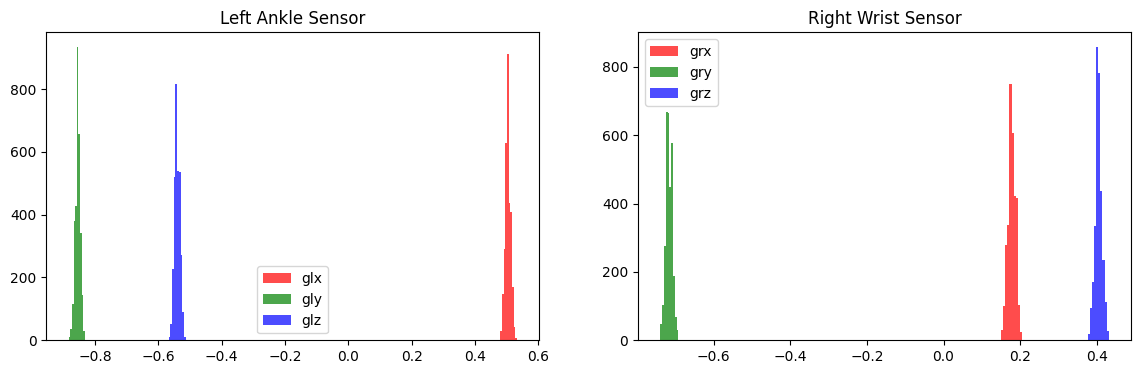



          ---------------------- Lying down (1 min) - a ----------------------


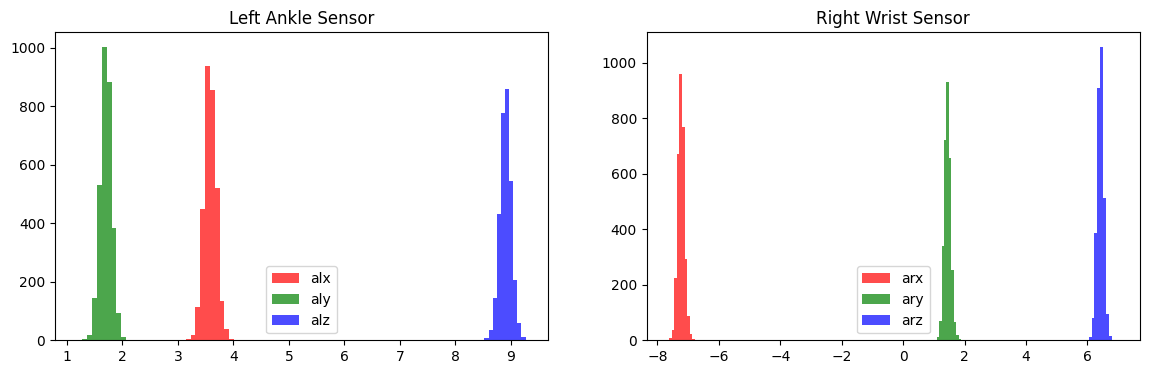



          ---------------------- Lying down (1 min) - g ----------------------


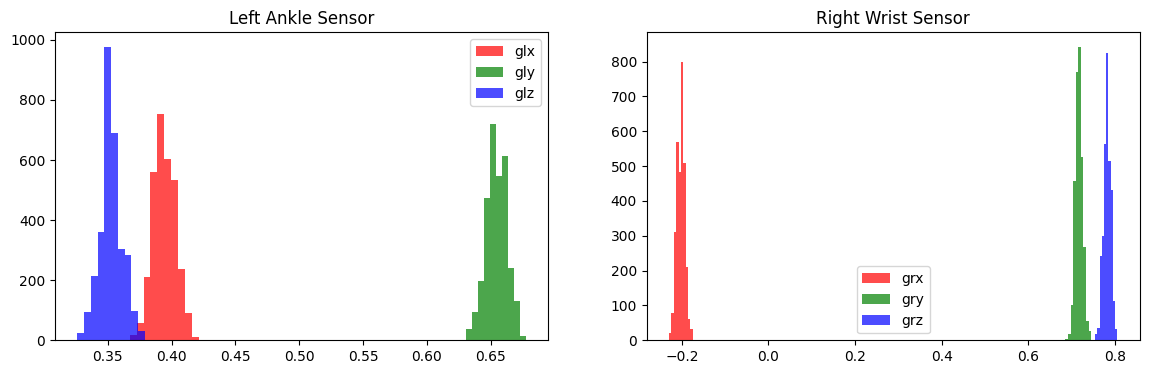



          ---------------------- Walking (1 min) - a ----------------------


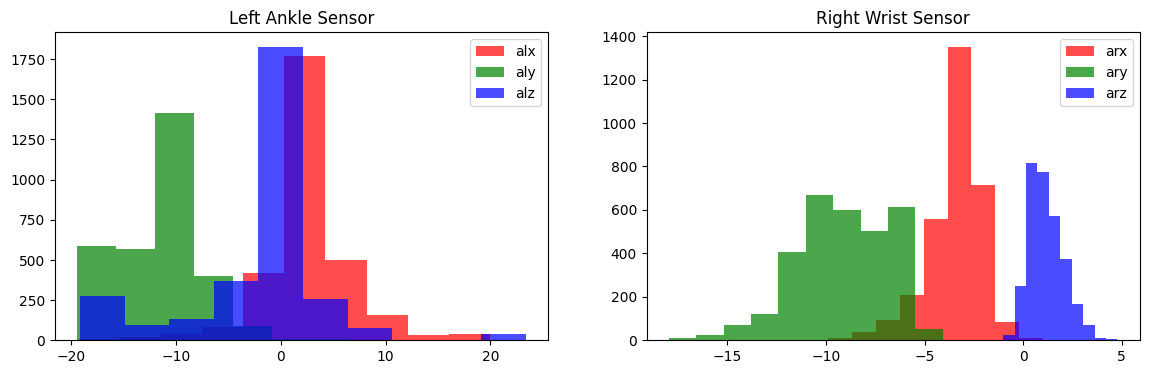



          ---------------------- Walking (1 min) - g ----------------------


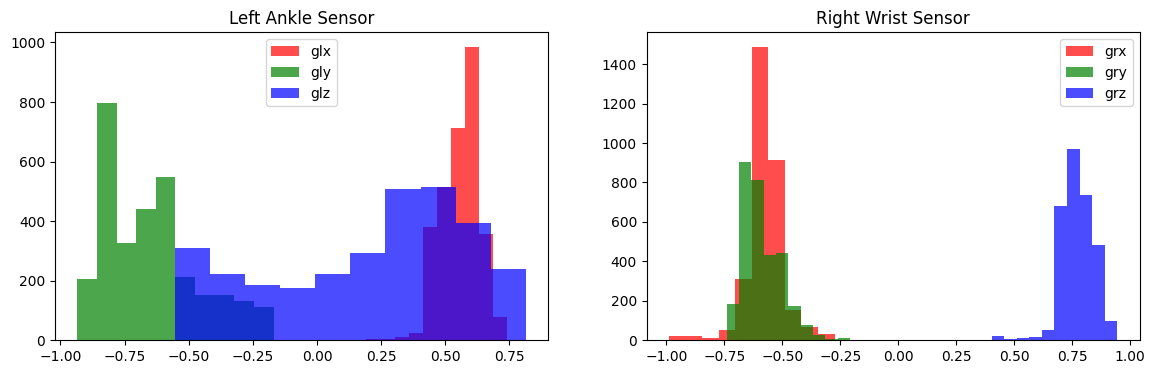



          ---------------------- Climbing stairs (1 min) - a ----------------------


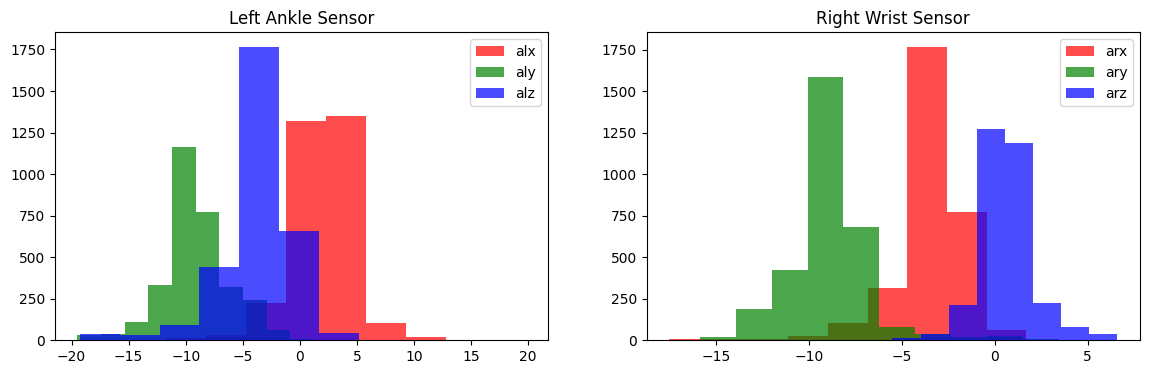



          ---------------------- Climbing stairs (1 min) - g ----------------------


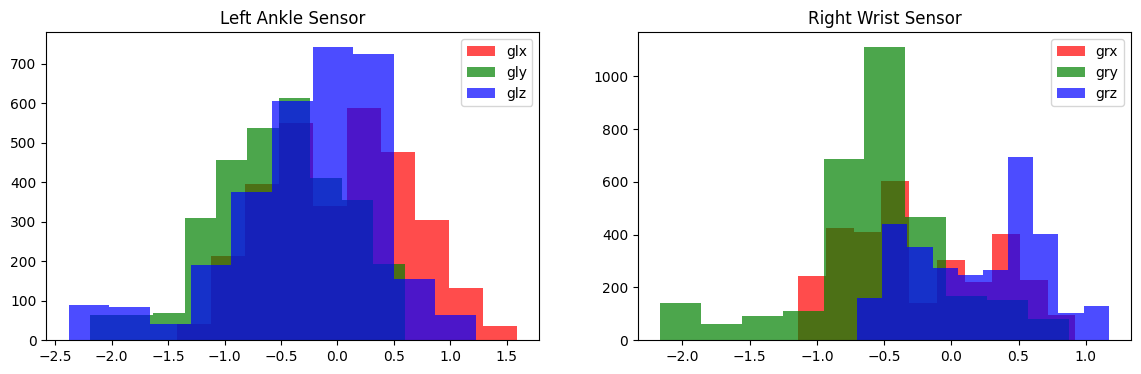



          ---------------------- Waist bends forward (20x) - a ----------------------


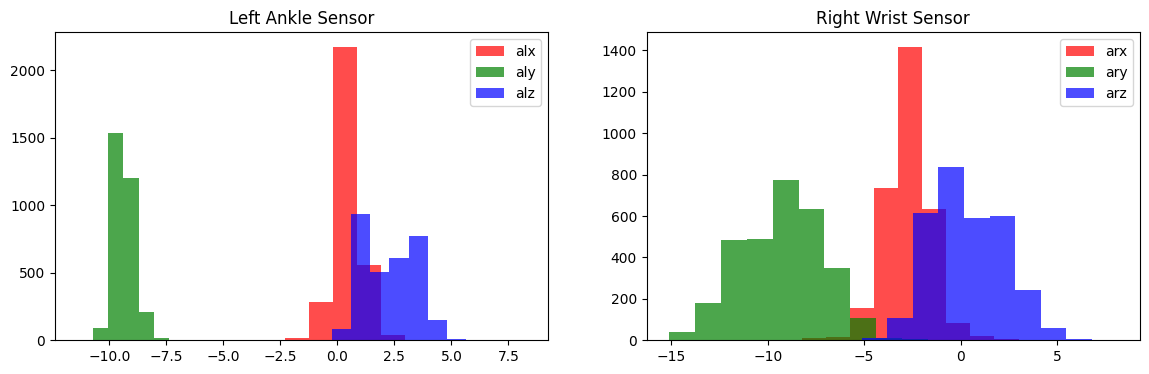



          ---------------------- Waist bends forward (20x) - g ----------------------


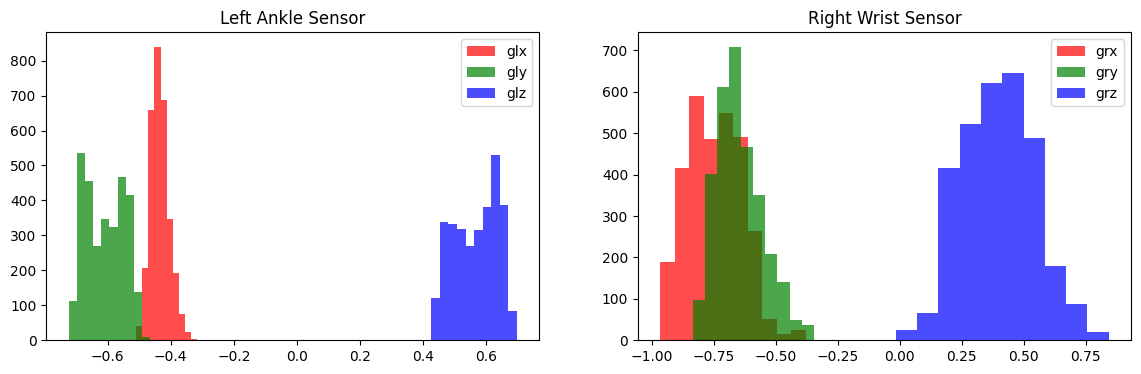



          ---------------------- Frontal elevation of arm (20x) - a ----------------------


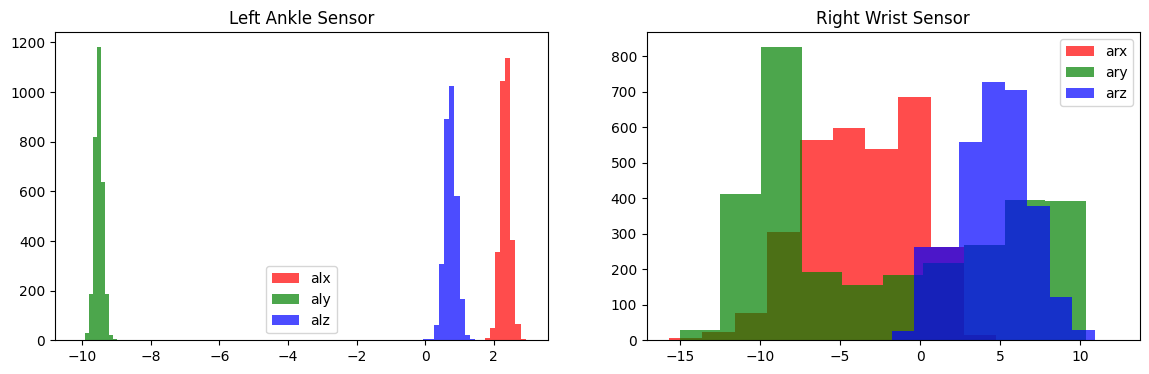



          ---------------------- Frontal elevation of arm (20x) - g ----------------------


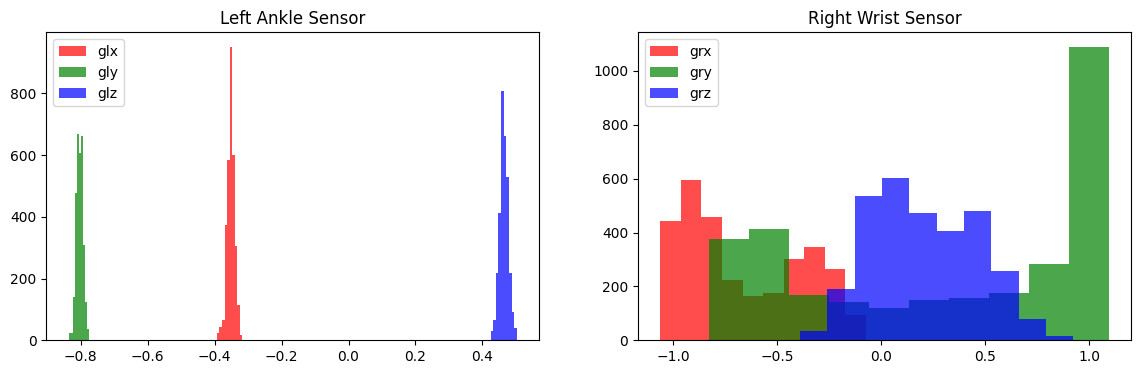



          ---------------------- Knees bending (crouching) (20x) - a ----------------------


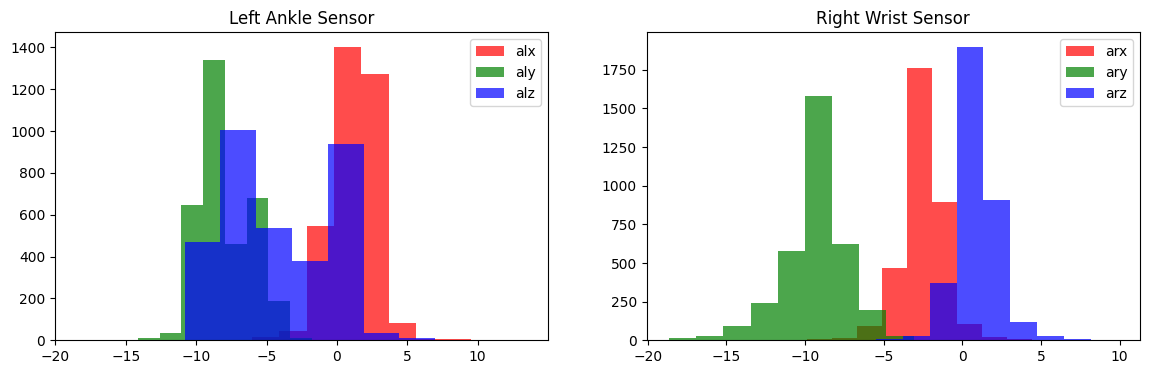



          ---------------------- Knees bending (crouching) (20x) - g ----------------------


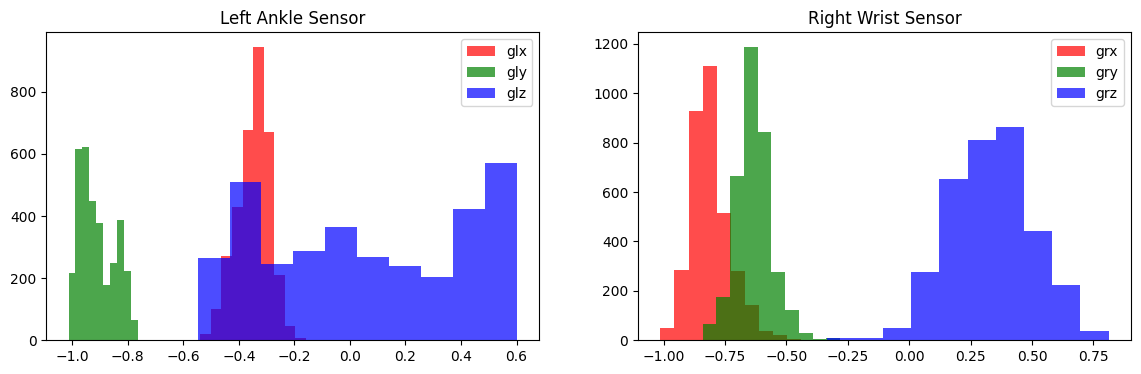



          ---------------------- Cycling (1 min) - a ----------------------


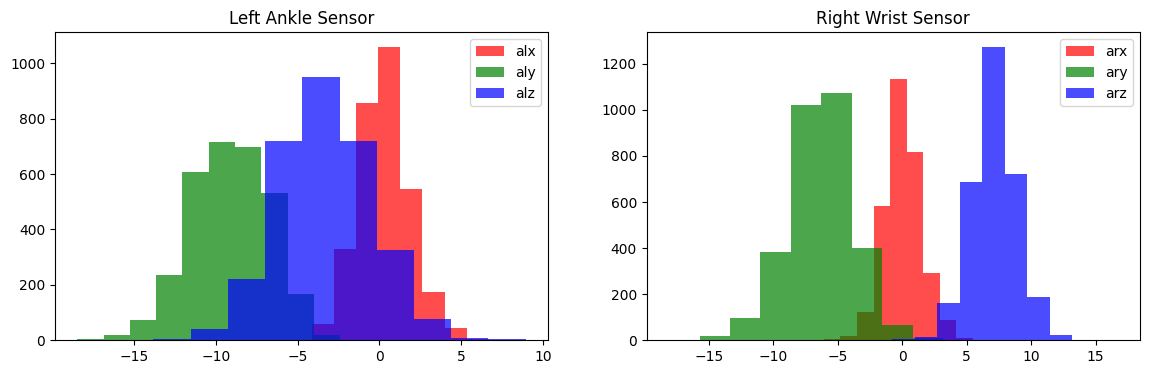



          ---------------------- Cycling (1 min) - g ----------------------


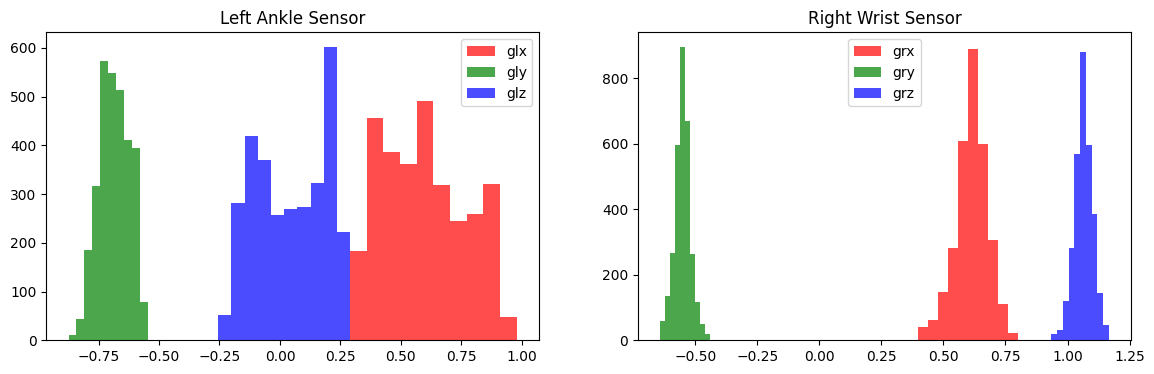



          ---------------------- Jogging (1 min) - a ----------------------


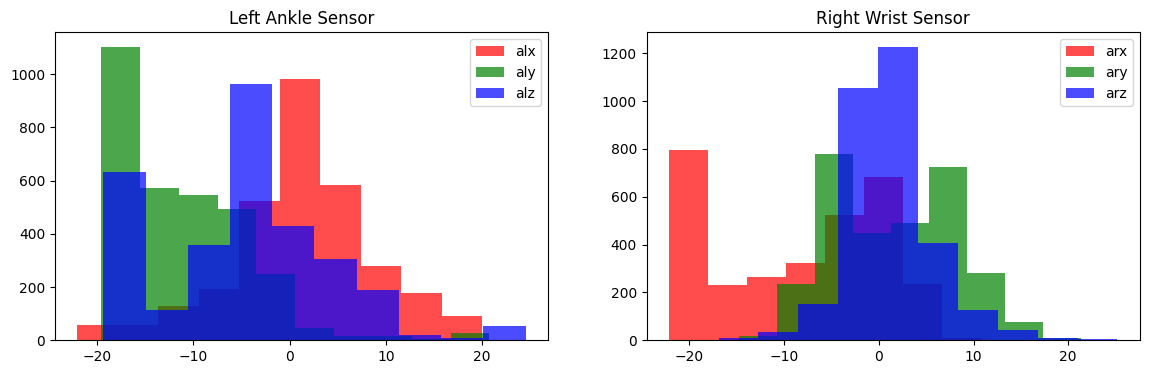



          ---------------------- Jogging (1 min) - g ----------------------


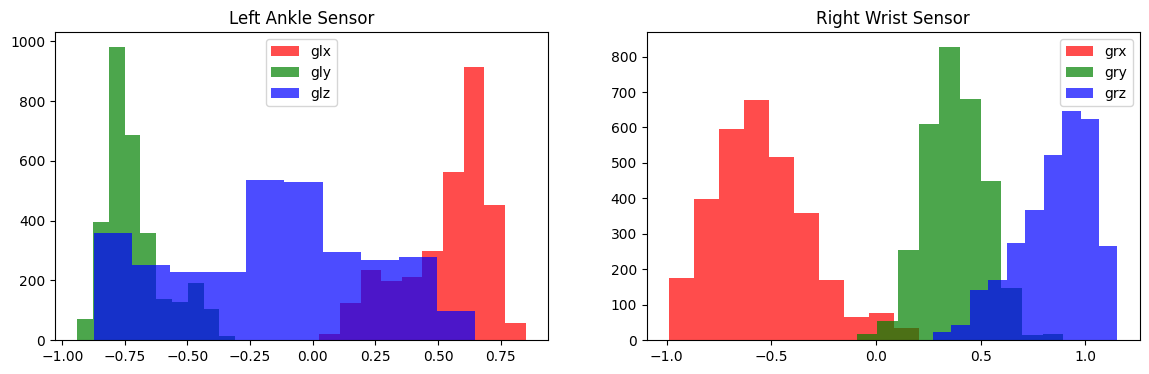



          ---------------------- Running (1 min) - a ----------------------


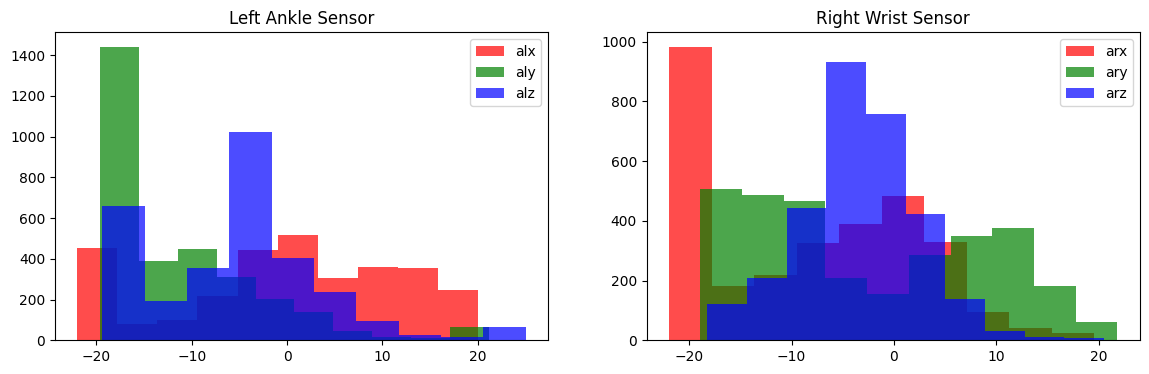



          ---------------------- Running (1 min) - g ----------------------


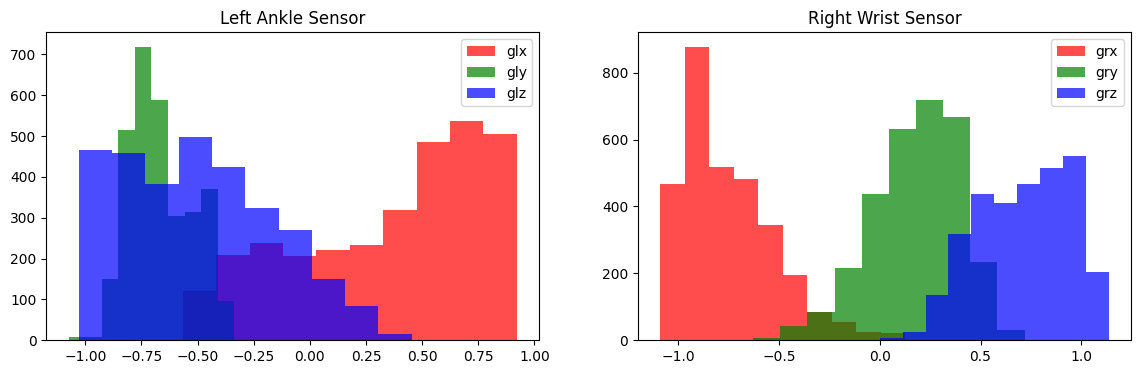



          ---------------------- Jump front & back (20x) - a ----------------------


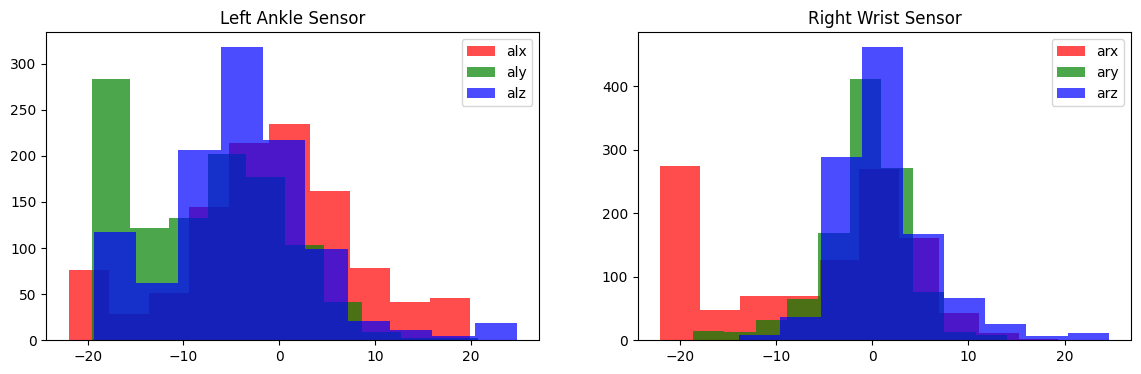



          ---------------------- Jump front & back (20x) - g ----------------------


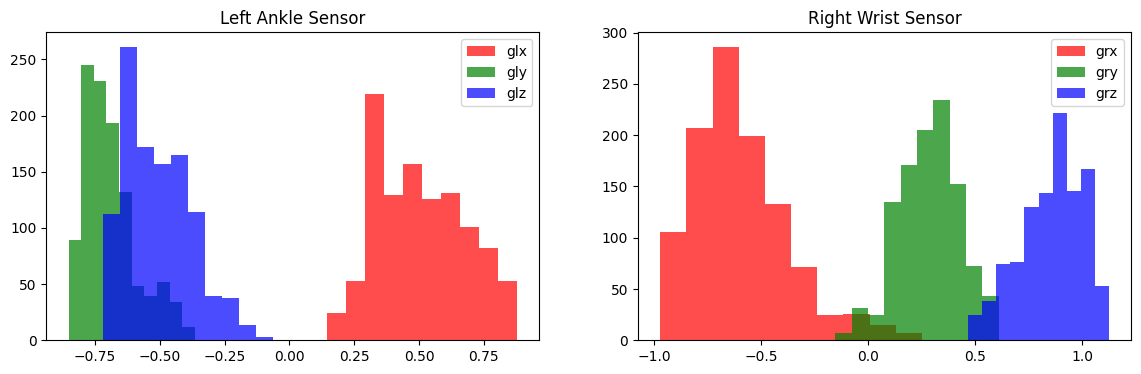

In [14]:
subject1 = df[df["subject"] == 'subject1']
readings = ['a', 'g']

for i in range (1,13):
    for r in readings:
        print(f"\n\n          ---------------------- {activity_label[i]} - {r} ----------------------")
        plt.figure(figsize=(14,4))
        plt.subplot(1,2,1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lx"],
                color = "red", alpha = 0.7, label = r + "lx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ly"],
                color = "green", alpha = 0.7, label = r + "ly")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "lz"],
                color = "blue", alpha = 0.7, label = r + "lz")
        plt.title("Left Ankle Sensor")
        plt.legend()

        plt.subplot(1,2,2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rx"],
                color = "red", alpha = 0.7, label = r + "rx")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "ry"],
                color = "green", alpha = 0.7, label = r + "ry")
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + "rz"],
                color = "blue", alpha = 0.7, label = r + "rz")
        plt.title("Right Wrist Sensor")
        plt.legend()
        plt.show()

In [15]:
df["Activity"] = df["Activity"].map(activity_label)

C:\Users\nakul\AppData\Local\Temp\ipykernel_8004\3223654105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Activity"] = df["Activity"].map(activity_label)


In [16]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.81770,-0.058824,-0.93429,-0.344830,Standing still (1 min),subject1
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.51890,-0.058824,-0.93429,-0.344830,Standing still (1 min),subject1
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.55070,-0.058824,-0.93429,-0.344830,Standing still (1 min),subject1
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.54130,-0.078431,-0.93429,-0.340520,Standing still (1 min),subject1
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.61270,-0.078431,-0.93429,-0.340520,Standing still (1 min),subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213641,-2.4873,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.437250,-1.01850,0.079741,Jump front & back (20x),subject10
1213642,-21.5910,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.437250,-1.01850,0.079741,Jump front & back (20x),subject10
1213643,7.5433,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.437250,-1.01850,0.079741,Jump front & back (20x),subject10
1213644,3.0142,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.425490,-1.03700,0.084052,Jump front & back (20x),subject10


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,343195.0,1.805184,4.214175,-22.1460,0.159875,1.372500,2.924450,20.0240
aly,343195.0,-9.061487,5.200389,-19.6190,-10.063000,-9.597700,-7.549800,21.1610
alz,343195.0,-0.701985,6.457622,-19.3730,-3.494350,0.340070,1.819300,25.0150
glx,343195.0,0.101167,0.458913,-1.7792,-0.345080,0.204080,0.487940,1.7106
gly,343195.0,-0.549942,0.434721,-2.6604,-0.810510,-0.688560,-0.487800,1.7523
glz,343195.0,-0.121145,0.555923,-2.6267,-0.567780,-0.098232,0.349710,1.5815
arx,343195.0,-3.448201,5.891595,-22.3450,-5.013900,-2.480000,-0.539050,19.8010
ary,343195.0,-5.781446,6.578371,-18.9720,-9.558100,-7.738900,-2.359550,21.9650
arz,343195.0,2.381165,4.177971,-18.2380,0.139070,1.819100,5.324750,25.7410
grx,343195.0,-0.201574,0.549524,-1.1706,-0.682350,-0.300000,0.278430,1.4157


In [18]:
df1 = df.copy()

for feature in df1.columns[:-2]:
    lower_range = np.quantile(df1[feature], 0.01)
    upper_range = np.quantile(df1[feature], 0.99)

    df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis = 0)
    
df.shape,df1.shape

((343195, 14), (269904, 14))

In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,269904.0,1.687118,2.730938,-11.56000,0.257310,1.312600,2.686100,19.29000
aly,269904.0,-8.834978,4.309397,-19.36800,-9.878000,-9.587100,-7.929600,1.94080
alz,269904.0,-0.138720,4.919041,-18.63000,-2.468925,0.488280,1.777900,12.02000
glx,269904.0,0.098845,0.456383,-0.73098,-0.358070,0.207790,0.500930,0.79592
gly,269904.0,-0.551816,0.412379,-1.03560,-0.806750,-0.686680,-0.508440,0.98311
glz,269904.0,-0.105007,0.531242,-1.09630,-0.542240,-0.082515,0.349710,0.82711
arx,269904.0,-3.186950,4.306458,-21.48400,-4.322400,-2.474500,-0.810737,6.85700
ary,269904.0,-5.970237,5.799759,-18.69600,-9.513800,-7.940650,-2.907075,11.21900
arz,269904.0,2.661296,3.103393,-6.49870,0.419107,1.894800,5.211125,10.24700
grx,269904.0,-0.174583,0.531841,-1.00200,-0.650980,-0.245100,0.321570,0.89804


In [20]:
le = LabelEncoder()
df1['subject'] = le.fit_transform(df1['subject'])
df1['Activity'] = le.fit_transform(df1['Activity'])

In [21]:
x = df1.drop(["Activity", "subject"], axis = 1).values
y = df1["Activity"].values

In [22]:
x

array([[  2.6493  ,  -9.4517  ,   0.37683 , ...,  -0.058824,  -0.93429 ,
         -0.34483 ],
       [  2.4157  ,  -9.5306  ,   0.40179 , ...,  -0.058824,  -0.93429 ,
         -0.34483 ],
       [  2.3865  ,  -9.5991  ,   0.48141 , ...,  -0.058824,  -0.93429 ,
         -0.34483 ],
       ...,
       [  6.7757  , -15.075   ,   7.3974  , ...,  -0.41765 ,  -1.037   ,
          0.088362],
       [ -2.4873  , -19.233   ,   3.4614  , ...,  -0.43725 ,  -1.0185  ,
          0.079741],
       [ -2.3698  , -19.3     ,  -4.2387  , ...,  -0.42549 ,  -1.037   ,
          0.084052]])

In [23]:
y

array([9, 9, 9, ..., 4, 4, 4])

In [24]:
rs = RobustScaler().fit_transform(x)
rs

array([[ 5.50356350e-01,  6.94929173e-02, -2.62431346e-02, ...,
         1.91533597e-01, -4.48385830e-01, -9.14790217e-01],
       [ 4.54176771e-01,  2.89981523e-02, -2.03658027e-02, ...,
         1.91533597e-01, -4.48385830e-01, -9.14790217e-01],
       [ 4.42154324e-01, -6.15889961e-03, -1.61767909e-03, ...,
         1.91533597e-01, -4.48385830e-01, -9.14790217e-01],
       ...,
       [ 2.24930933e+00, -2.81661876e+00,  1.62689068e+00, ...,
        -1.77420184e-01, -6.09740005e-01, -4.11027627e-01],
       [-1.56452390e+00, -4.95067748e+00,  7.00080648e-01, ...,
        -1.97573390e-01, -5.80677087e-01, -4.21053060e-01],
       [-1.51614590e+00, -4.98506467e+00, -1.11306211e+00, ...,
        -1.85481466e-01, -6.09740005e-01, -4.16039762e-01]])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [26]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train),":Training Accuracy")
print(lr.score(x_test,y_test),":Test Accuracy")

0.6802270436896082 :Training Accuracy
0.6782263323255676 :Test Accuracy


C:\Users\nakul\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [28]:
dt1 = DecisionTreeClassifier(random_state = 0, max_depth = 6)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train), ":Training Accuracy")
print(dt1.score(x_test, y_test), ":Test Accuracy")

0.7111960795937321 :Training Accuracy
0.7109342581065861 :Test Accuracy


In [29]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_train, y_train), ":Training Accuracy")
print(gnb.score(x_test, y_test), ":Test Accuracy")

0.7381538127136562 :Training Accuracy
0.7359505601991819 :Test Accuracy


In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(knn.score(x_train, y_train),":Training Accuracy")
print(knn.score(x_test,y_test),":Test Accuracy")

0.9631869109016539 :Training Accuracy
0.9476258225146719 :Test Accuracy


In [31]:
mlp = MLPClassifier(random_state =42)
mlp.fit(x_train, y_train)
print(mlp.score(x_train, y_train), ":Training Accuracy")
print(mlp.score(x_test, y_test), ":Test Accuracy")

C:\Users\nakul\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9863309423597526 :Training Accuracy
0.9825864010907582 :Test Accuracy


In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train), ":Training Accuracy")
print(rfc.score(x_test, y_test), ":Test Accuracy")

1.0 :Training Accuracy
0.9944424684332207 :Test Accuracy
